## STAT3612: Statistical Machine Learning
### Assignment 1: Python basics and logistic regression
### DUE: Feb 16, 2025, Sunday, 11:59 PM

In [17]:
# TODO: please make sure you have Python 3.6+
# please install these packages:
# ! pip install numpy pandas matplotlib seaborn sklearn umap-learn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
# from sklearn.model_selection import train_test_split

import umap
sns.set_style("darkgrid")

#### Question 1


1a) False. Classification problems involve predicting discrete labels or categories, whereas regression problems involve predicting continuous or integer-valued quantities. Here, the goal is to predict a count (number of customers), which is a regression task.


1b) True.


1c) False. A model with lower bias overfits and performs well on train data, leading to poor generalization on test data. A model with slightly higher bias but lower variance might perform better on test data.


1d) True.


#### Question 2
2a)

theta0 (intercept): 1.0000000000000042
theta1 (slope): 2.0


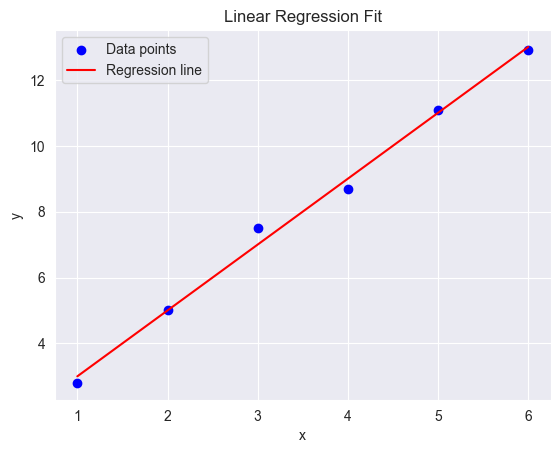

In [19]:
# Given data
q2_x = np.array([1, 2, 3, 4, 5, 6])
q2_y = np.array([2.8, 5.0, 7.5, 8.7, 11.1, 12.9])

# Calculate the coefficients (theta0 and theta1) using numpy's polyfit
theta1, theta0 = np.polyfit(q2_x, q2_y, 1)

# Print the coefficients
print(f"theta0 (intercept): {theta0}")
print(f"theta1 (slope): {theta1}")

# Create the regression line
regression_line = theta0 + theta1 * q2_x

# Plot the data points
plt.scatter(q2_x, q2_y, color='blue', label='Data points')

# Plot the regression line
plt.plot(q2_x, regression_line, color='red', label='Regression line')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()



2b)


In [20]:
# Construct matrix with increasing power
X = np.vander(q2_x, 6, increasing=True)

# Solve for the coefficients
theta = np.linalg.inv(X.T @ X) @ X.T @ q2_y

# Calculate the predicted values
q2y_pred = X @ theta

# Compute the training error
training_error = np.sum((q2_y - q2y_pred) ** 2)

print(f"Coefficients (theta): {theta}")
print(f"Predicted values: {q2y_pred}")
print(f"Training error: {training_error}")

Coefficients (theta): [ 14.9999999  -28.9049999   23.4791666   -7.92499998   1.22083333
  -0.07      ]
Predicted values: [ 2.79999996  4.99999997  7.49999998  8.69999998 11.09999998 12.89999998]
Training error: 4.035041436580033e-15


Using cost function $$J(\theta) = \sum_{i=1}^{6} \left( y_i - \hat{y}_{\theta}(x_i) \right)^2$$, the training error computed is 4.035*10^-15.


#### Part 2: Python and NumPy basics

#### Question 3

3a)

In [21]:
file_path = "Employee-Attrition-Classification.csv"
col_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents", "Attrition"]

# Q3 (a)  

# ------------------
# Write your code here
df = pd.read_csv(file_path)
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Stayed" else 0)
display(df)

# ------------------

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,1
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,1
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,1
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,1
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,0
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,0
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,1
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,0


3b)

In [22]:
# Q3 (b)  

attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]

# ------------------
# Write your code here
df_attr = df[attr_names]
df_attr_describe = df_attr.describe()
df_attr_describe.drop("count", inplace=True)
display(df_attr_describe)

# ------------------

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Number of Promotions,Number of Dependents
mean,38.565875,15.753901,7302.397983,50.007651,55.758415,0.832578,1.648075
std,12.079673,11.245981,2151.457423,28.466459,25.411090,0.994991,1.555689
min,18.000000,1.000000,1316.000000,1.000000,2.000000,0.000000,0.000000
25%,28.000000,7.000000,5658.000000,25.000000,36.000000,0.000000,0.000000
50%,39.000000,13.000000,7354.000000,50.000000,56.000000,1.000000,1.000000
75%,49.000000,23.000000,8880.000000,75.000000,76.000000,2.000000,3.000000
max,59.000000,51.000000,16149.000000,99.000000,128.000000,4.000000,6.000000


3c)

In [23]:
# Q3 (c)  

# ------------------
# Write your code here
corr_matrix = df_attr.corr()
display(corr_matrix)

# ------------------

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Number of Promotions,Number of Dependents
Age,1.000000,0.539806,-0.001989,-0.007063,0.237048,0.000167,0.002927
Years at Company,0.539806,1.000000,-0.005288,-0.006888,0.442180,-0.000229,0.003973
Monthly Income,-0.001989,-0.005288,1.000000,-0.002528,-0.005397,0.006418,0.002582
Distance from Home,-0.007063,-0.006888,-0.002528,1.000000,-0.005595,-0.007882,0.000659
Company Tenure,0.237048,0.442180,-0.005397,-0.005595,1.000000,0.003903,0.001600
Number of Promotions,0.000167,-0.000229,0.006418,-0.007882,0.003903,1.000000,-0.000558
Number of Dependents,0.002927,0.003973,0.002582,0.000659,0.001600,-0.000558,1.000000


3d)

In [24]:
# Q3 (d)  

attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]

# ------------------
# Write your code here
df_attr_standardised = (df_attr - df_attr.mean()) / df_attr.std()     
display(df_attr_standardised)

# ------------------

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Number of Promotions,Number of Dependents
0,-0.626331,0.288645,-0.888885,-0.983883,1.308153,1.173299,-1.059386
1,1.691612,-1.045165,-0.821954,-1.019012,-1.367844,2.178333,0.869020
2,-1.205817,-0.511641,0.398150,-1.370302,0.717859,-0.836770,0.869020
3,-0.212413,-0.778403,-1.540071,-0.808237,-0.226610,0.168265,0.226218
4,1.443261,2.244900,-1.153357,0.737442,0.481742,-0.836770,-1.059386
...,...,...,...,...,...,...,...
59593,0.946559,-0.333799,-1.342531,0.561796,-0.816904,0.168265,0.226218
59594,-1.702519,-1.045165,0.342838,-0.281301,0.678506,2.178333,-1.059386
59595,-1.371384,-0.155958,0.298217,-0.562334,-1.053021,-0.836770,0.226218
59596,-1.288601,-0.689482,-2.031831,0.421280,-1.840079,-0.836770,-1.059386


3e)

In [25]:
# Q3 (e)  

# ------------------
# Write your code here
df_attributes = df[col_names]
df_80 = df_attributes.sample(frac=0.8, random_state=1)
df_20 = df_attributes.drop(index=df_80.index)

df_80_attr = df_80[attr_names]
df_20_attr = df_20[attr_names]

df_80_standardised = (df_80_attr - df_80_attr.mean()) / df_80_attr.std()
df_20_standardised = (df_20_attr - df_20_attr.mean()) / df_20_attr.std()

# ------------------

Ans: By standardizing the entire dataset before splitting, the test set indirectly influences the scaling of the training set as the mean and standard deviation are computed using information from the test set.

This introduces data leakage, where the trained model has access to information about the test set during training, leading to biased performance metrics.

We should calculate the mean and std only rely on training data, as testing data is considered as not known during training.

#### Part 2: Data visualization

4a)

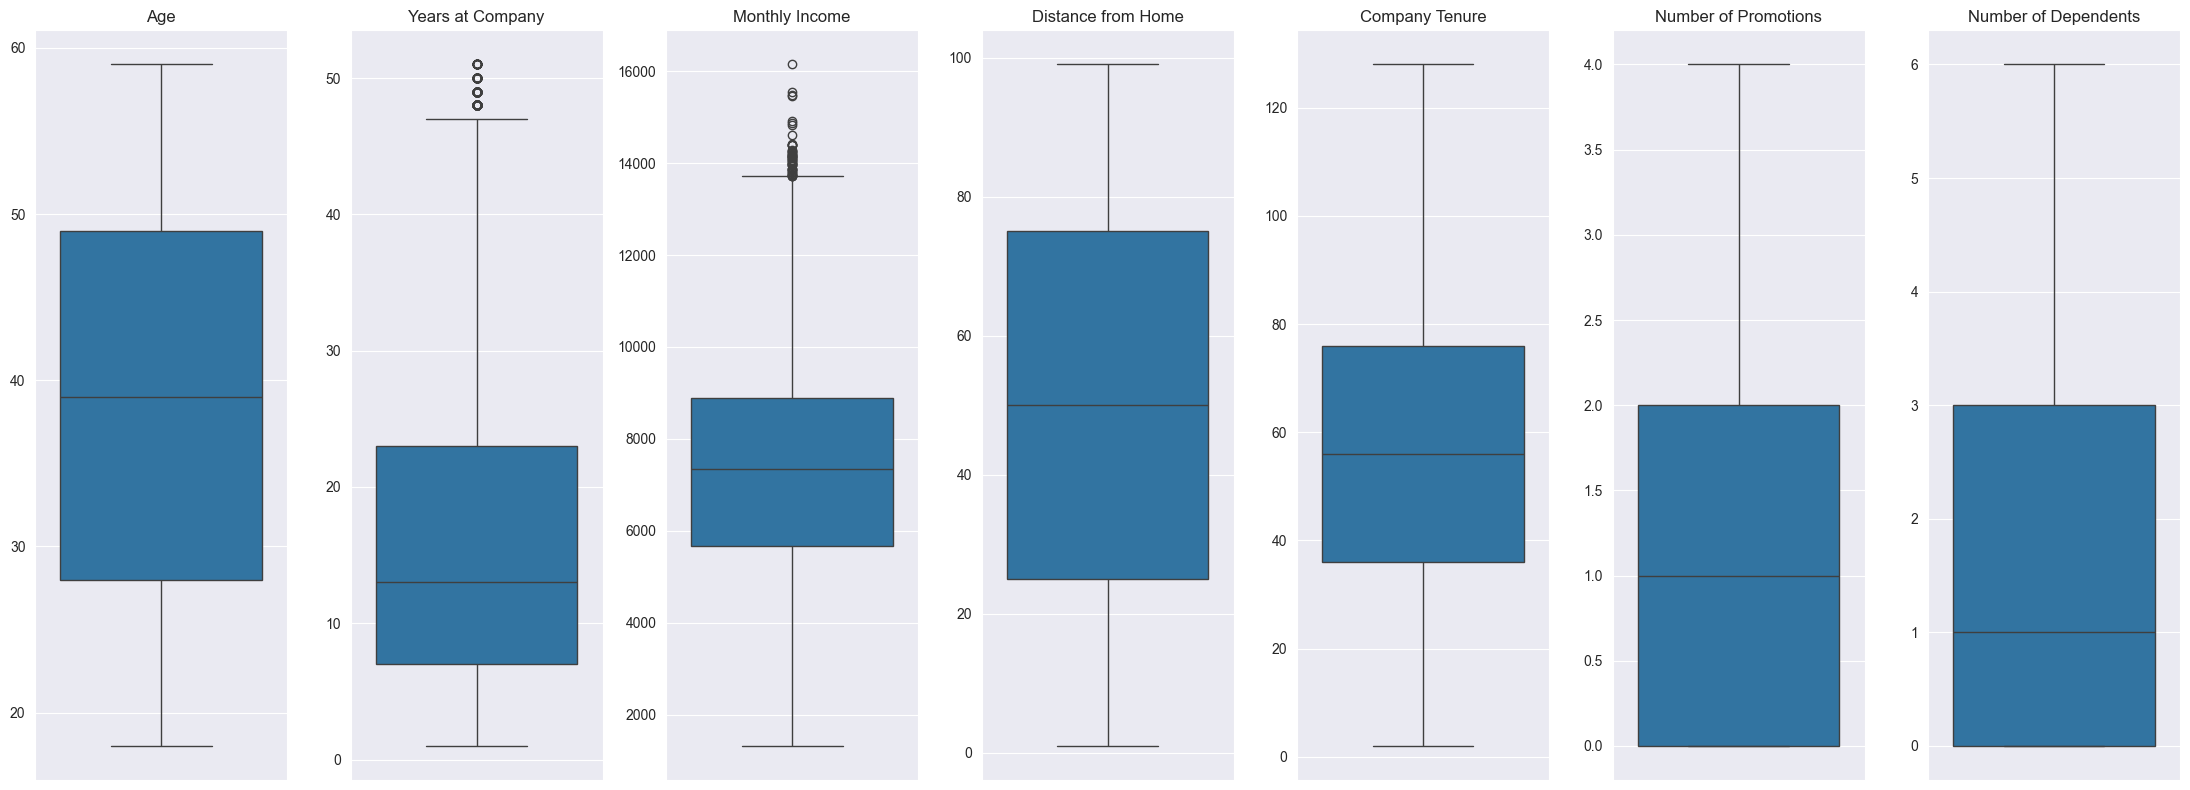

In [26]:
# Q4 (a)  

# ------------------
# Write your code here
fig, axes = plt.subplots(1, 7, figsize=(22, 8))

# Loop through each column and create a box plot
for i, col in enumerate(df_attr.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

# ------------------

4b)


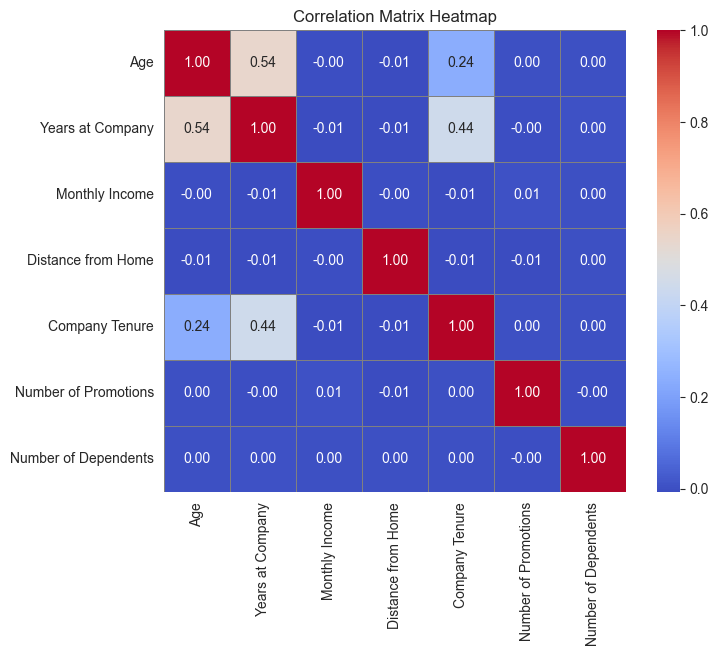

In [27]:
# Q4 (b)
#  -------------------
# Write your code here
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor="gray",
)

plt.title("Correlation Matrix Heatmap")
plt.show()

# -------------------

4c)

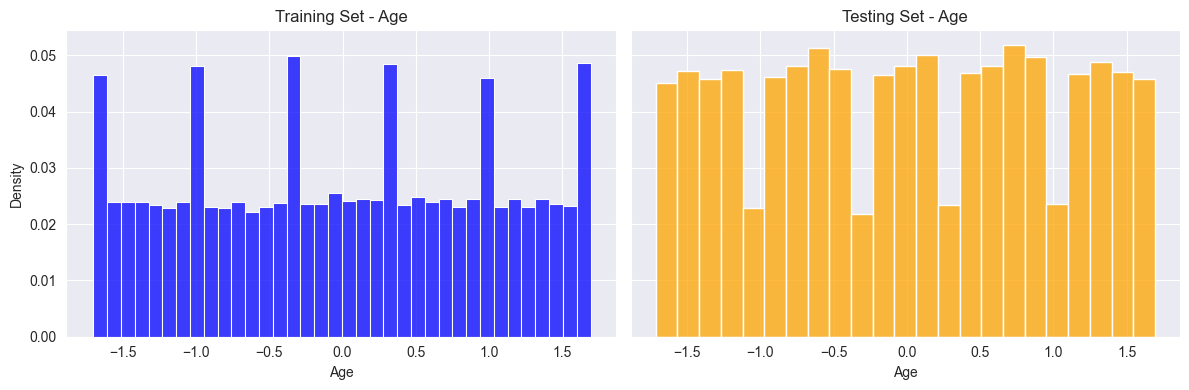

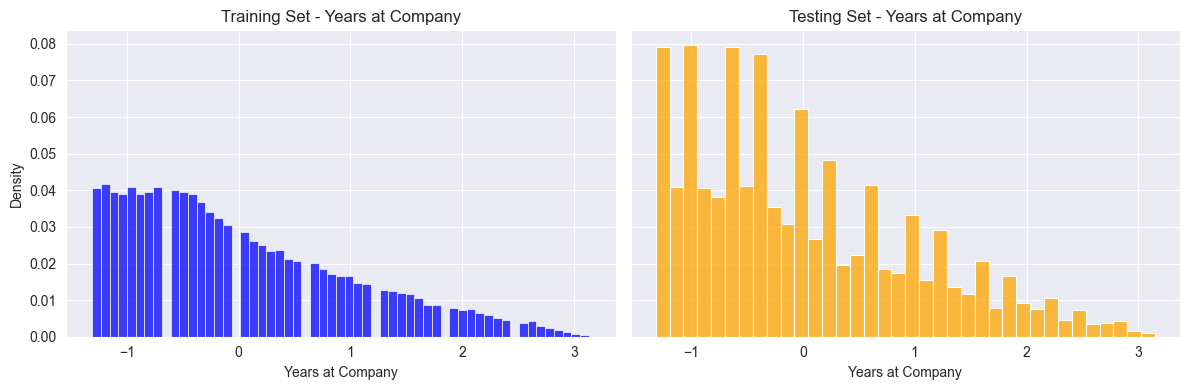

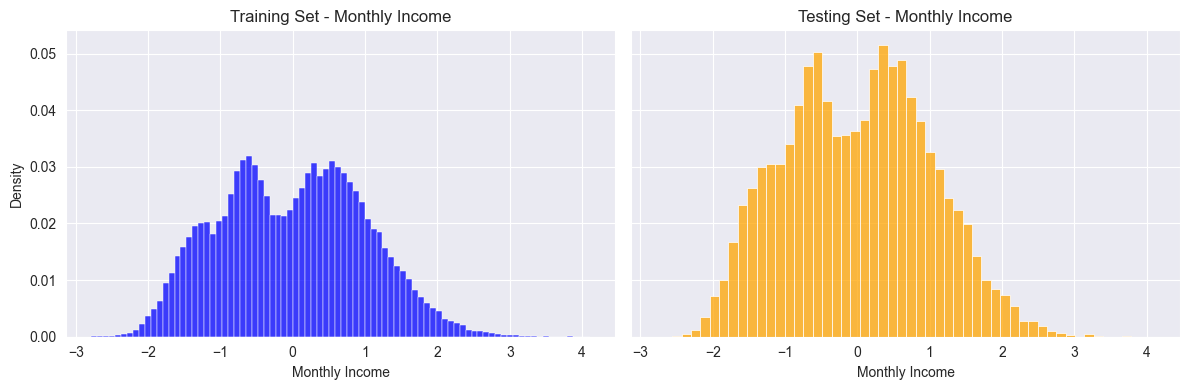

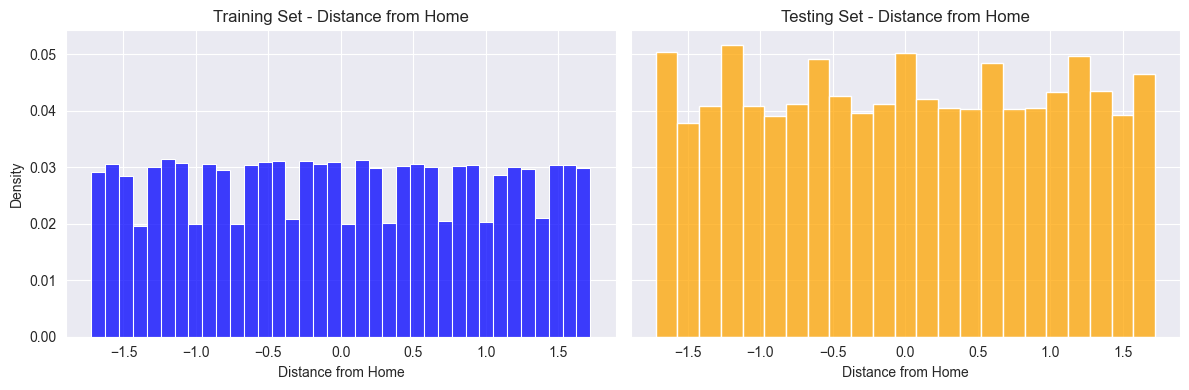

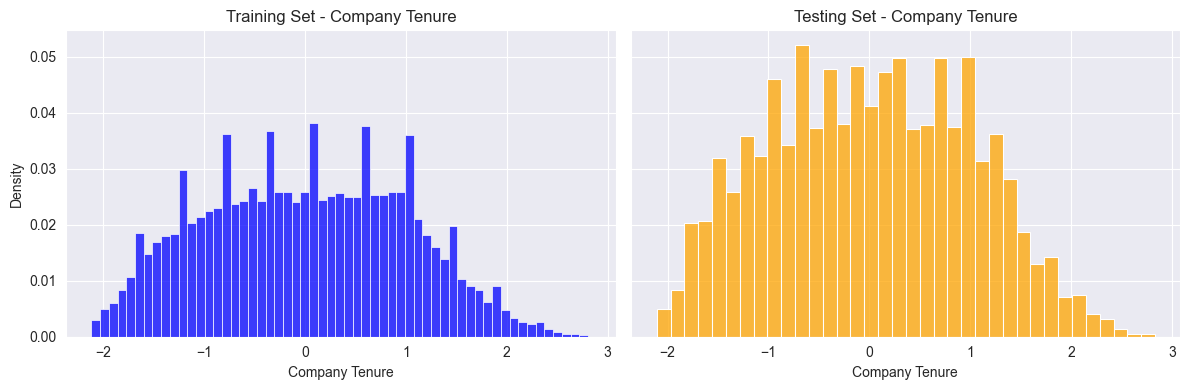

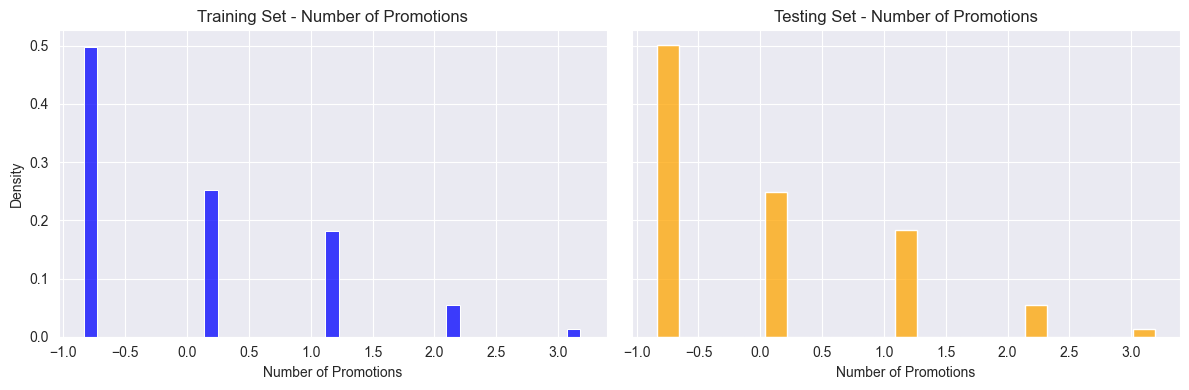

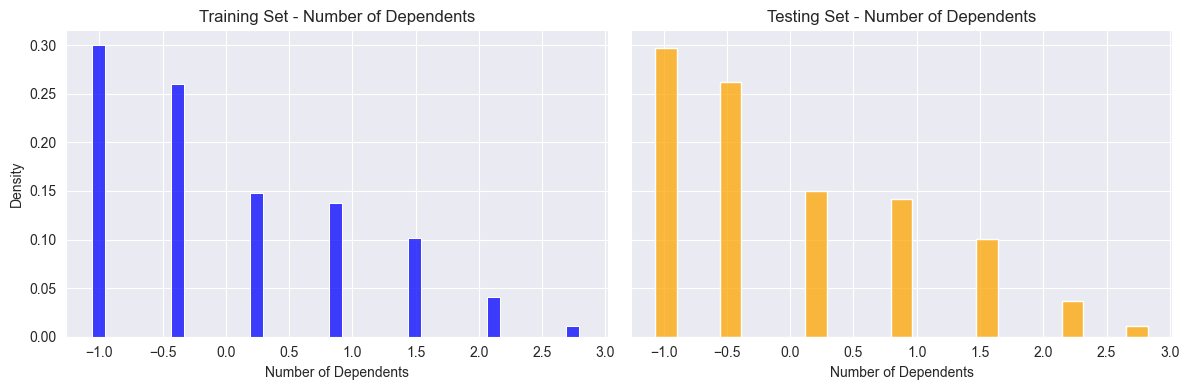

In [28]:
# Q4 (c)
#  -------------------
# Write your code here
for col in df_80_standardised.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

    # Plot training set distribution
    sns.histplot(df_80_standardised[col], color="blue", ax=axes[0], stat="probability")
    axes[0].set_title(f"Training Set - {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")

    # Plot testing set distribution
    sns.histplot(
        df_20_standardised[col], color="orange", ax=axes[1], stat="probability"
    )
    axes[1].set_title(f"Testing Set - {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

#  -------------------

#### Part 3: Logistic regression

5a)

In [29]:
# Q5 (a)
train_columns = [
    "Age",
    "Years at Company",
    "Monthly Income",
    "Distance from Home",
    "Company Tenure",
    "Number of Promotions",
    "Number of Dependents",
]
test_columns = ["Attrition"]

# -------------------
# Write your code here
X_train, y_train, X_test, y_test = (
    df_80_standardised,
    df_80["Attrition"],
    df_20_standardised,
    df_20["Attrition"],
)

model = LogisticRegression()
model.fit(X_train, y_train)

model_coefficients = pd.DataFrame(
    {"Attribute": attr_names, "Coefficient": model.coef_[0]}
)
print(model_coefficients)

# -------------------

              Attribute  Coefficient
0                   Age     0.048789
1      Years at Company     0.099969
2        Monthly Income     0.016129
3    Distance from Home    -0.197254
4        Company Tenure     0.003194
5  Number of Promotions     0.169220
6  Number of Dependents     0.161791


5b)

Based on the model's output, the important positive features are "Number of Promotions" and "Number of Dependents", having the largest positive coefficients, suggesting they are the strongest predictors of retention. While "Age", "Years at Company", "Monthly Income", "Company Tenure" all have positive coefficients, its magnitude is not as large compared to "Number of Promotions" and "Number of Dependents", 0.169 and 0.162 respectively.

The feature "Distance from Home" with a negative coefficient, makes it a predictor of attrition.

Intuitively, this makes sense as employees who are promoted would be happy that they are recognised by peers and seniors, while those who have dependents need to continue working for provide for their dependents. Thus, these groups of workers are more likely to stay. On the other hand, employees who live far from work are more likely to leave, likely due to commute-related stress and time wasted on commuting everyday.


5c)

In [30]:
# Q5 (c)

# -------------------
# Write your code here

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("\nTraining Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("\nTesting Set Metrics:")
print(classification_report(y_test, y_test_pred))

# -------------------


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.55      0.45      0.50     22562
           1       0.58      0.67      0.62     25116

    accuracy                           0.57     47678
   macro avg       0.56      0.56      0.56     47678
weighted avg       0.56      0.57      0.56     47678


Testing Set Metrics:
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      5776
           1       0.56      0.67      0.61      6144

    accuracy                           0.56     11920
   macro avg       0.56      0.55      0.55     11920
weighted avg       0.56      0.56      0.55     11920



5d)

I would like to introduce additional predictors "Job Satisfaction", "Employee Recognition", "Overtime", "Work-Life Balance", "Job Level".

In [31]:
# Introduce additional predictors and data cleaning
additional_columns = [
    "Job Satisfaction",
    "Employee Recognition",
    "Overtime",
    "Work-Life Balance",
    "Job Level",
]

attr_names.extend(additional_columns)
col_names.extend(additional_columns)

df["Job Satisfaction"] = df["Job Satisfaction"].apply(
    lambda x: 0 if x == "Low" else 1 if x == "Medium" else 2 if x == "High" else 3
)
df["Employee Recognition"] = df["Employee Recognition"].apply(
    lambda x: 0 if x == "Low" else 1 if x == "Medium" else 2 if x == "High" else 3
)
df["Overtime"] = df["Overtime"].apply(lambda x: 0 if x == "No" else 1)
df["Work-Life Balance"] = df["Work-Life Balance"].apply(
    lambda x: 0 if x == "Poor" else 1 if x == "Fair" else 2 if x == "Good" else 3
)
df["Job Level"] = df["Job Level"].apply(
    lambda x: 0 if x == "Entry" else 1 if x == "Mid" else 2
)

In [32]:
# Q5 (d)
# -------------------
# Write your code here
dff_attributes = df[col_names]
dff_80 = dff_attributes.sample(frac=0.8, random_state=1)
dff_20 = dff_attributes.drop(index=dff_80.index)

dff_80_attr = dff_80[attr_names]
dff_20_attr = dff_20[attr_names]

dff_80_standardised = (dff_80_attr - dff_80_attr.mean()) / dff_80_attr.std()
dff_20_standardised = (dff_20_attr - dff_20_attr.mean()) / dff_20_attr.std()

# Fit model
X_train_2, y_train_2, X_test_2, y_test_2 = (
    dff_80_standardised,
    dff_80["Attrition"],
    dff_20_standardised,
    dff_20["Attrition"],
)

model2 = LogisticRegression()
model2.fit(X_train_2, y_train)

model2_coefficients = pd.DataFrame(
    {"Attribute": attr_names, "Coefficient": model2.coef_[0]}
)
print(model2_coefficients)

# Report summary
y_test_pred_2 = model2.predict(X_test_2)
y_train_pred_2 = model2.predict(X_train_2)

print("\nTraining Set Metrics:")
print(classification_report(y_train_2, y_train_pred_2))

print("\nTesting Set Metrics:")
print(classification_report(y_test_2, y_test_pred_2))
# -------------------

               Attribute  Coefficient
0                    Age     0.057908
1       Years at Company     0.111990
2         Monthly Income     0.023430
3     Distance from Home    -0.228861
4         Company Tenure     0.004037
5   Number of Promotions     0.197314
6   Number of Dependents     0.187384
7       Job Satisfaction    -0.030714
8   Employee Recognition     0.019771
9               Overtime    -0.126311
10     Work-Life Balance     0.431720
11             Job Level     0.718147

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     22562
           1       0.68      0.69      0.69     25116

    accuracy                           0.67     47678
   macro avg       0.67      0.67      0.67     47678
weighted avg       0.67      0.67      0.67     47678


Testing Set Metrics:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66      5776
           1       0.68  

Simply include more attributes could improve the performance easily.